In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import datetime as dt
from datetime import datetime
%matplotlib inline

In [197]:
item=pd.read_csv('/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/Winter Offensive Weapon Case.csv')

In [200]:
item.tail(10)

,Date,Price,Quatity Sold
3515,Sep 06 2021 03: +0,4.400,1
3516,Sep 06 2021 04: +0,4.640,21
3517,Sep 06 2021 05: +0,4.870,24
3518,Sep 06 2021 06: +0,4.882,12
3519,Sep 06 2021 07: +0,4.921,10
3520,Sep 06 2021 08: +0,4.939,18
3521,Sep 06 2021 09: +0,4.315,6
3522,Sep 06 2021 10: +0,4.732,5
3523,Sep 06 2021 11: +0,4.994,15
3524,Sep 06 2021 12: +0,4.340,23


##Data Preprocessing

In [165]:
## function to filter only date from the string and return 
def filterdate(s):
  s=s.split()
  date_str=' '.join([s[0],s[1],s[2]])
  return datetime.strptime(date_str, '%b %d %Y').date()


In [166]:
item['Date'] = item['Date'].apply(filterdate)
item.head()

,Date,Price,Quatity Sold
0,2013-12-19,6.930,11433
1,2013-12-20,4.273,14869
2,2013-12-21,3.352,15204
3,2013-12-22,2.689,16540
4,2013-12-23,2.353,17821


In [167]:
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3525 non-null   object 
 1   Price         3525 non-null   float64
 2   Quatity Sold  3525 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 82.7+ KB
None


In [104]:
item.describe()

,Price,Quatity Sold
count,3525.000000,3525.000000
mean,2.123794,3680.654468
std,1.531393,9195.167959
min,0.053000,1.000000
25%,0.954000,225.000000
50%,1.504000,400.000000
75%,3.871000,933.000000
max,7.084000,65889.000000


In [105]:
bool_series = pd.isnull(item['Price'])
print(item[bool_series])
bool_series=pd.isnull(item['Quatity Sold'])
print(item[bool_series])
bool_series=pd.isnull(item['Date'])
print(item[bool_series])
#checking null values in the dataset, there is no null value

Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []


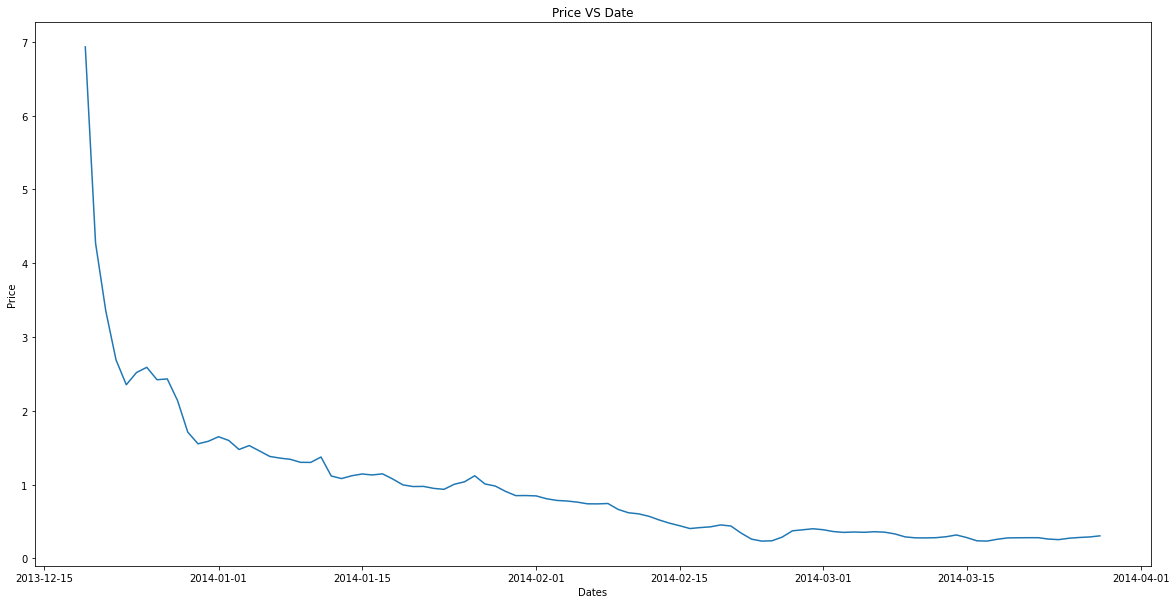

In [106]:
plt.figure(figsize=(20,10))
plt.title('Price VS Date')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(item['Date'][:100], item['Price'][:100])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f85b3b450>,
      dtype=object)

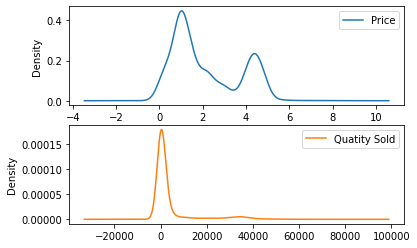

In [107]:
#Density plots
item[['Price', 'Quatity Sold']].plot(kind='density', subplots=True, sharex=False)


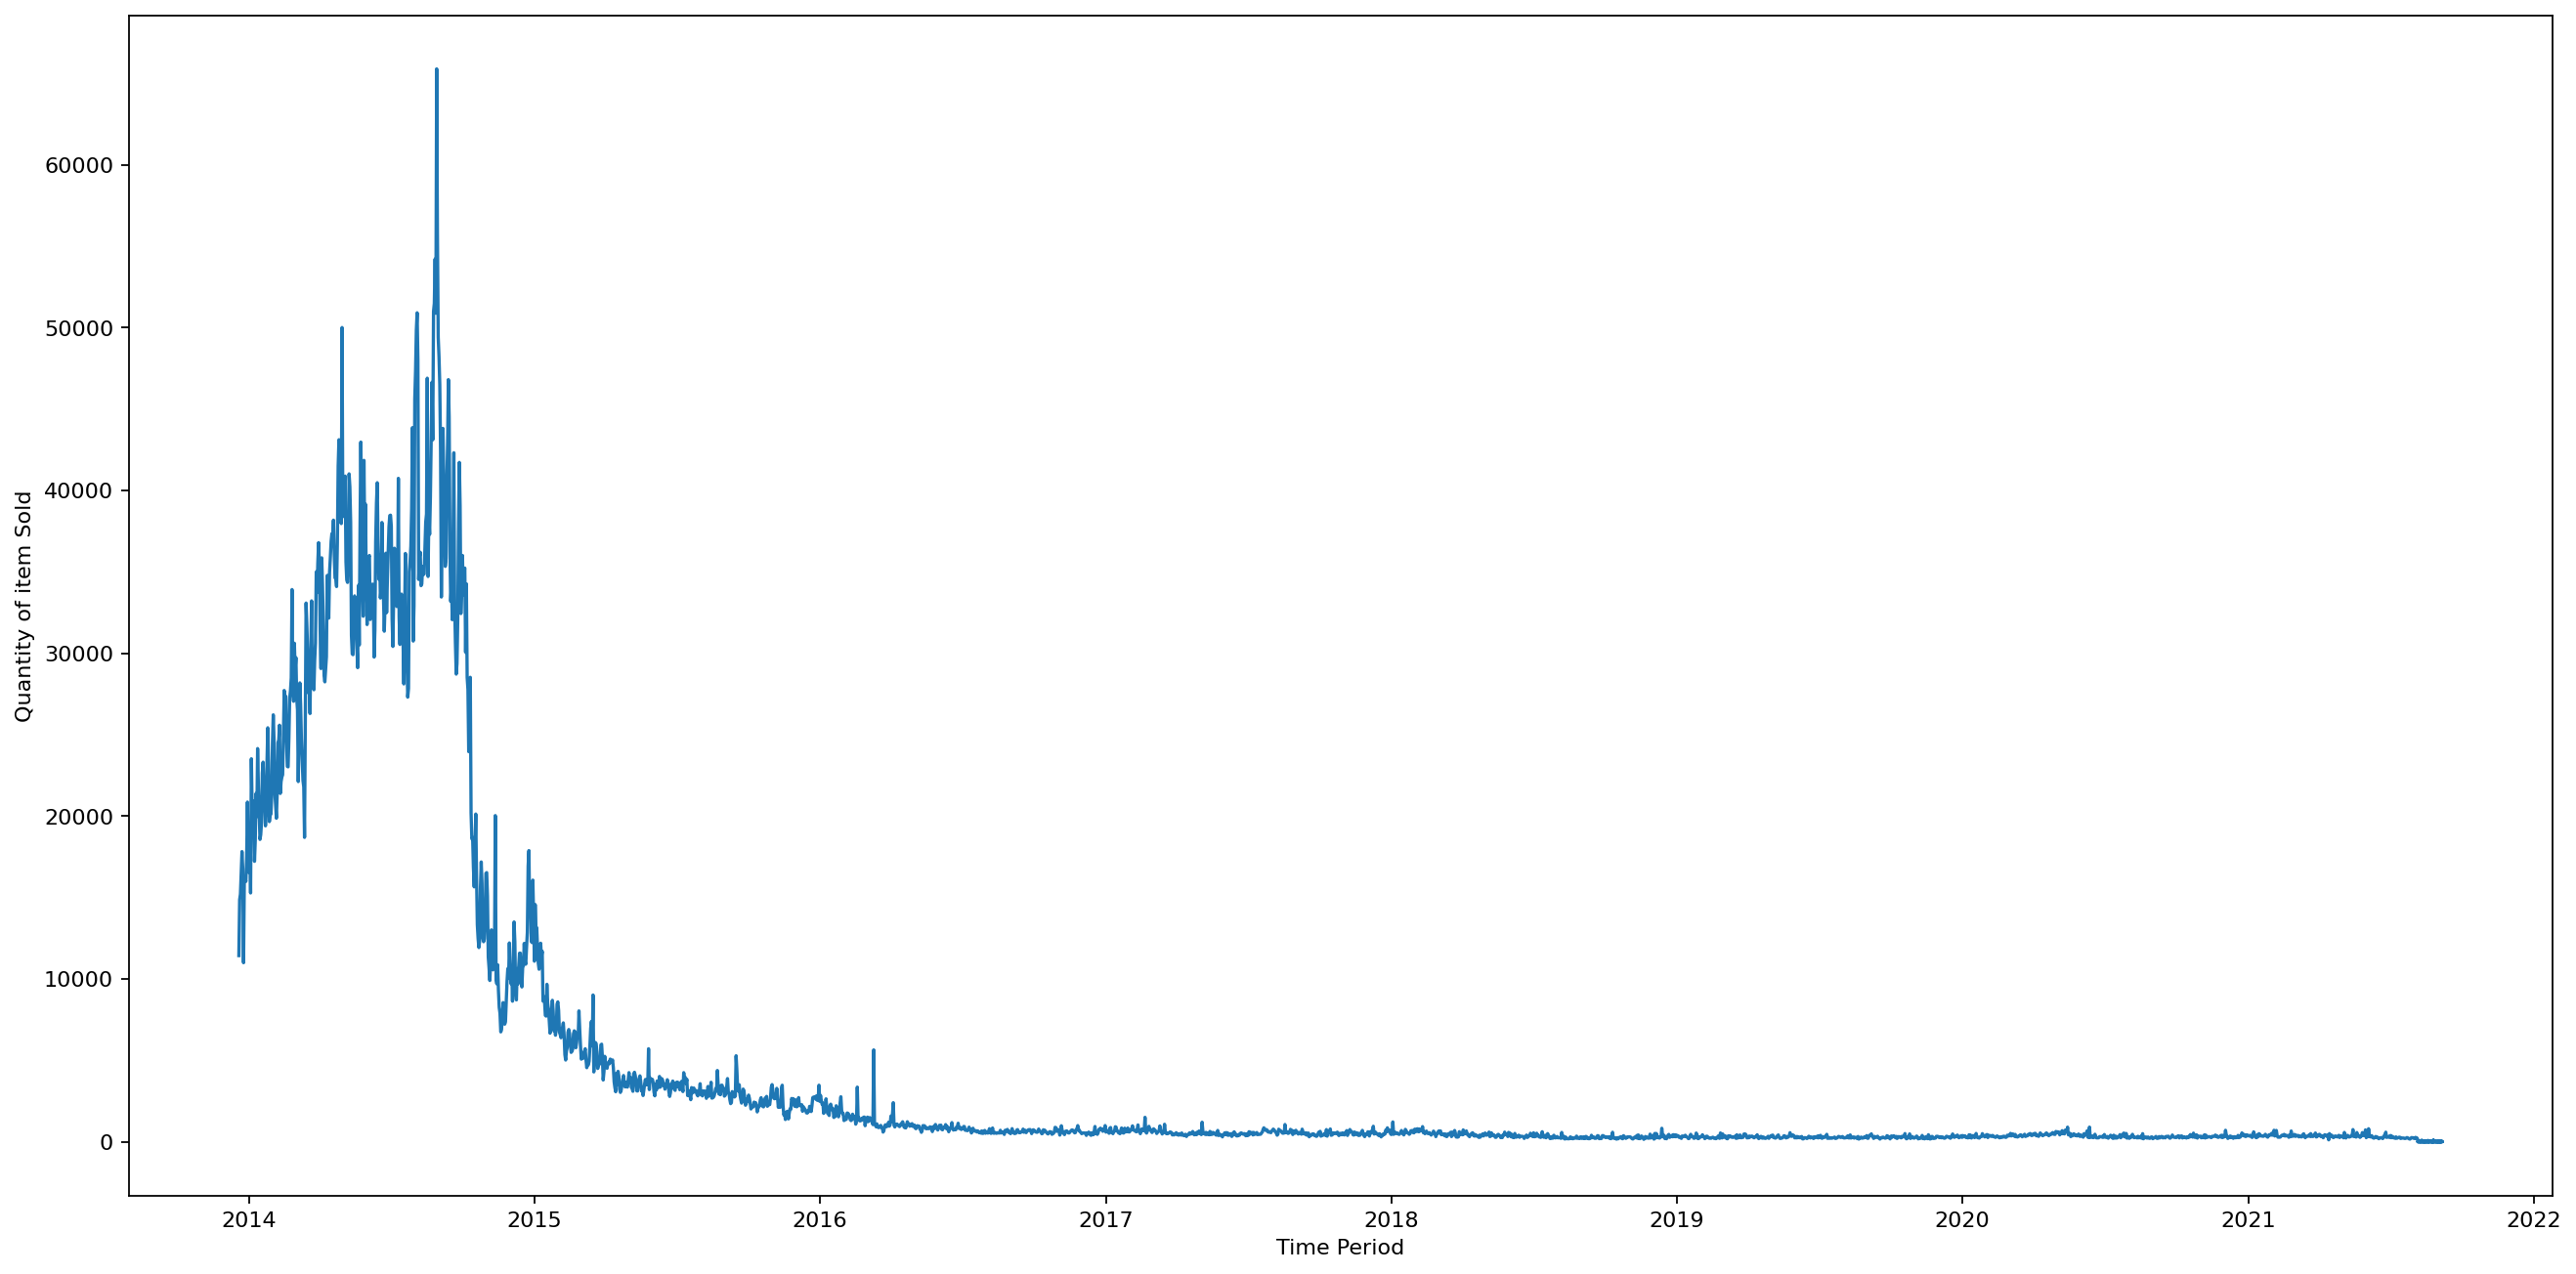

In [108]:
plt.figure(figsize=(20,10), dpi=160)
plt.xlabel('Time Period')
plt.ylabel('Quantity of item Sold')
plt.plot(item['Date'], item['Quatity Sold'])
plt.show()

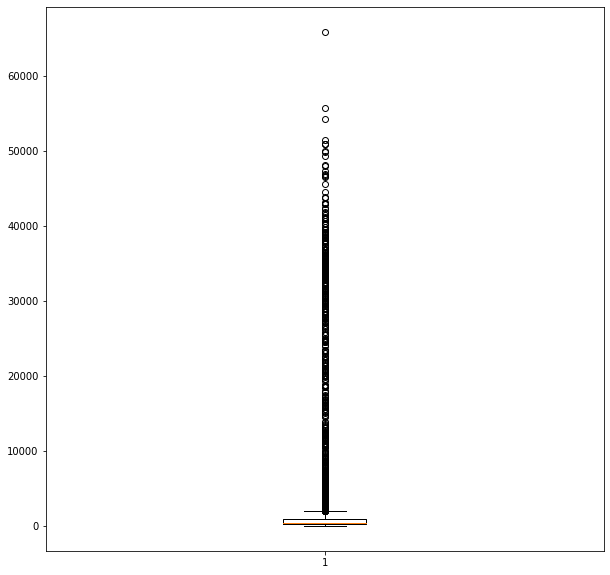

In [109]:
#box whisker's plot
#item.plot(kind='box', subplots=True, sharex=False, sharey=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Quatity Sold'])
plt.show()
#ax.boxplot(item['Price'])
#plt.show()

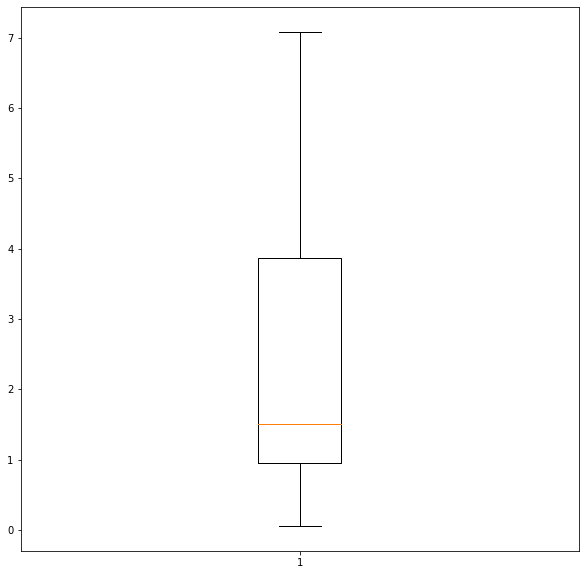

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Price'])
plt.show()

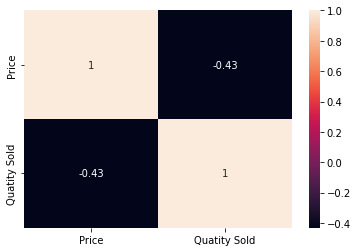

In [111]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

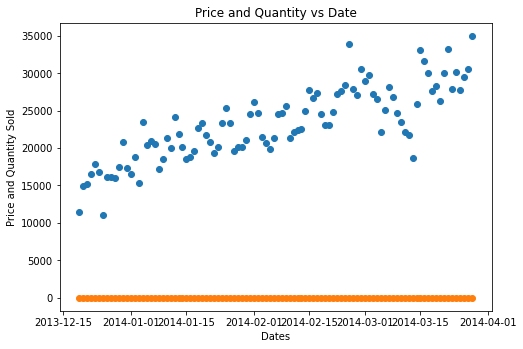

In [112]:
#scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'][:100], item['Quatity Sold'][:100])
ax.scatter(item['Date'][:100], item['Price'][:100])
ax.set_xlabel('Dates')
ax.set_ylabel('Price and Quantity Sold')
ax.set_title('Price and Quantity vs Date')
plt.show()

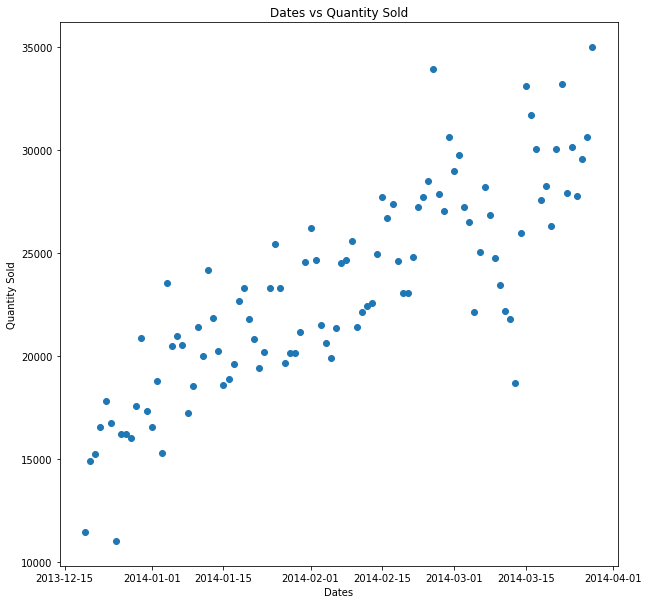

In [113]:
plt.figure(figsize=(10,10))
plt.xlabel('Dates')
plt.ylabel('Quantity Sold')
plt.title('Dates vs Quantity Sold')
plt.scatter(item['Date'][:100],item['Quatity Sold'][:100])
plt.show()

## Converting Dates into numerical data

In [170]:

item['Date'] = item['Date'].apply(lambda x :x.toordinal())
item.head()

,Date,Price,Quatity Sold
0,735221,6.930,11433
1,735222,4.273,14869
2,735223,3.352,15204
3,735224,2.689,16540
4,735225,2.353,17821


##Fitting according to the dates and the prices

###Model 1 using price and date as y and x 

In [171]:
reg1=linear_model.LinearRegression()
reg1.fit(item[['Date']], item.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
reg1.predict([[datetime.strptime("2016-01-01", "%Y-%m-%d").toordinal()]])

array([0.71288695])

In [175]:
reg1.coef_

array([0.00149286])

In [176]:
reg1.intercept_

-1097.9777476324173

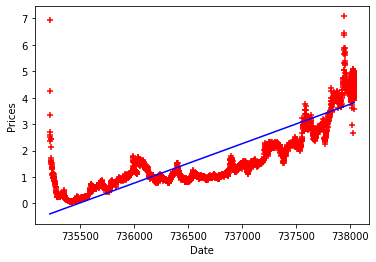

In [177]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, reg1.predict(item[['Date']]), color='blue')

###Model 2 using price quantity sold and dates

In [178]:
reg2=linear_model.LinearRegression()
reg2.fit(item[['Date', 'Quatity Sold']], item[['Price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
reg2.coef_

array([[1.64929679e-03, 2.61753895e-05]])

In [180]:
reg2.intercept_

array([-1213.35436682])

In [181]:
reg2.predict([[3524, 0]])

array([[-1207.54224494]])

##Ploting the linear curve

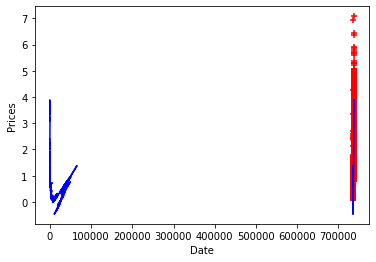

In [182]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item[['Date', 'Quatity Sold']], reg2.predict(item[['Date', 'Quatity Sold']]), color='blue')

## function to predict the price of the item from our model

###predicting on model 1 linear regression using only date and price as x and y attributes

In [194]:
def prediction(date):
  return reg1.predict([[date]])


In [195]:
#@title Default title text
Enter_date = "2021-09-24" #@param {type:"date"}
date=list(map(int, Enter_date.split('-')))
date=dt.date(year=date[0], month=date[1], day=date[2])
print(prediction(date.toordinal()))

[3.83744127]
